In [5]:
import ee
# # If you are running this notebook for the first time, you need to activate the command below for the authentication flow:
# ee.Authenticate()


In [6]:
import sys
import os

out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
filename = os.path.join(out_dir, 'Enschede.tif')

try:
    # Initialize the library.
    ee.Initialize()
    print('Google Earth Engine has initialized successfully!')
except ee.EEException as e:
    print('Google Earth Engine has failed to initialize!')
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

Google Earth Engine has initialized successfully!


In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geemap
import rasterio
import numpy as np
import pandas as pd
from PIL import Image

with rasterio.open(filename, 'r') as ds:
    img = ds.read()  # read all raster values

img = img[0:12,:,:] # 12 spectral bands
img = np.transpose(img, [1, 2, 0]) # numpy array [row, col, bands]
print(img.shape)


(301, 461, 12)


First, read the satellite image that you have downloaded in the previous assignment. Then, visualize this
image and explore some important characteristics (e.g., its size) of it.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(301, 461, 3)


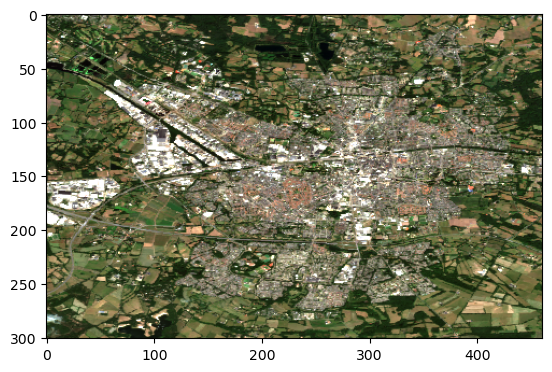

In [8]:
# B2-->Blue
# B3-->Green
# B4-->Red
# remember the indexes in NumPy arrays start with 0 --> bands begin from 0!

img_rgb = img[:,:,[3,2,1]]
print(img_rgb.shape)

def MyNormalize(img_i,sigma):
    nr,nc,nb = img_i.shape
    img_n = np.zeros(shape=(nr,nc,nb))
    for i in range(0,nb):
        one_band = img_i[:,:,i]
        mi = np.min(one_band)
        ma = np.max(one_band)
        one_band = (one_band-mi)/(ma-mi+np.finfo(float).eps)
        img_n[:,:,i] = sigma*one_band
    return img_n

# width = img_rgb.width
# height = img_rgb.height
# print("Image is " + width + "x " + height)

img_array = np.array(img_rgb)
img_array.shape

plt.imshow(MyNormalize(img_rgb,5))

Now, reshape the image and convert it a 2d tabular data format and then cluster it into 2 groups using K-means clustering from sklearn.cluster.


In [9]:
from sklearn.cluster import KMeans

#The -1 in the reshape() function specifies that the new shape should be determined based on the size of the original array and the size of the last dimension
img_reshaped = img_rgb.reshape(-1, img_rgb.shape[-1])
print(img_reshaped.shape)
kmeans = KMeans(n_clusters=2)
kmeans.fit(img_reshaped)
labels = kmeans.predict(img_reshaped)

(138761, 3)


/Users/hungnguyen/miniforge3/envs/DS-CVassignment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Finally, reshape the clustering results vector to a 2d map (the same size as the original image) and visualize
it.

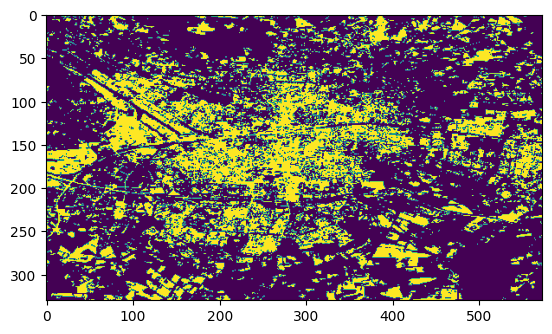

In [28]:
#reshape labels back to original image shape
labels_back = labels.reshape(img_array.shape[0], img_array.shape[1])
plt.imshow(labels_back)
plt.show()


Clusters:2


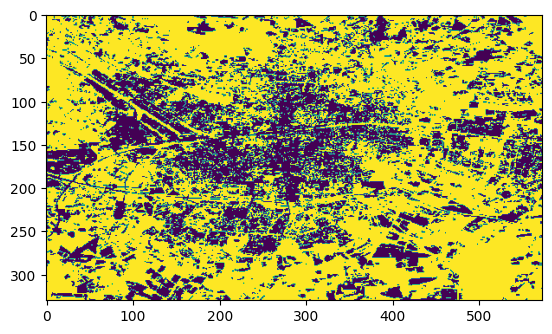

Clusters:3


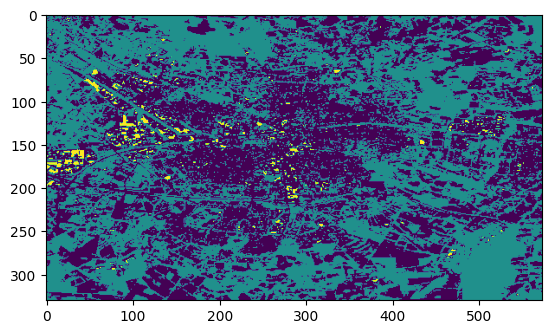

Clusters:4


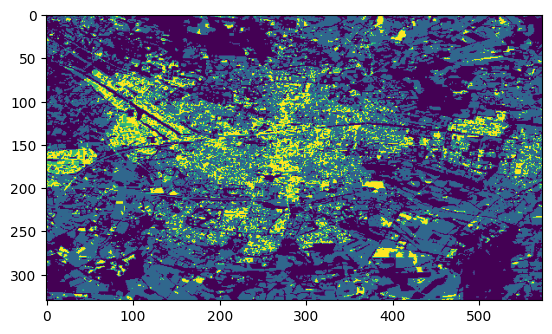

Clusters:5


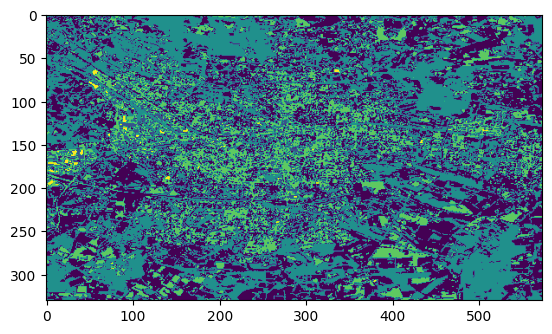

Clusters:6


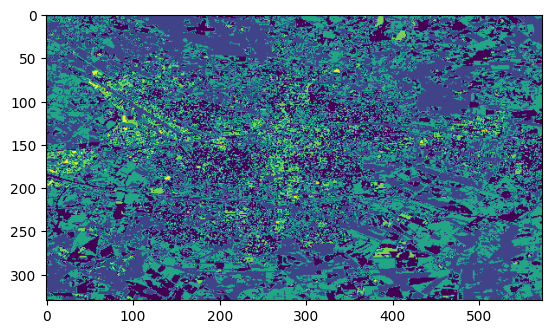

Clusters:7


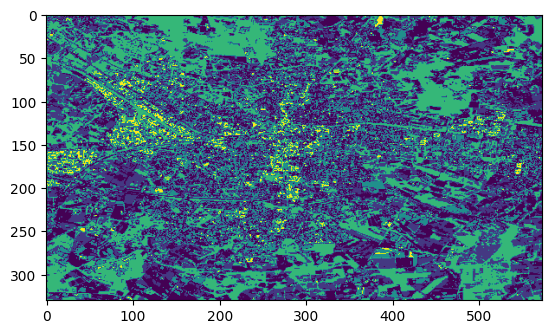

In [37]:
for x in range(6):
    kmeans = KMeans(n_clusters=x+2)
    kmeans.fit(img_reshaped)
    labels = kmeans.predict(img_reshaped)
    labels_back = labels.reshape(img_array.shape[0], img_array.shape[1])
    print("Clusters:" + str(x+2))
    plt.imshow(labels_back)
    plt.show()


Can you distinguish the city extend?
    -With cluster size of 2 the city is hard to distinguish. The road leading North West is clear due to its diagonal.

What happens if you change the number of clusters?
    -increasing the cluster size makes the algorithm find more subtle differences. Higher values lead to finer clusters. As you can see in the image of cluster size 7 the map is too detailed to see properly see the city. Cluster size of 2 is not detailed enough

What could be the best number of clusters to delineate the urban areas?
    -This is a bit subjective, but cluster size of 4 or 5 make the city well delinated. The overall shape in these images is easy to distinguish from the landscape around and the streets are well illustrated as well.
